# **Data Science for Business - Labor Market Analysis**

The aim of this project is to analyse, by means of data science techniques, the labor market for citizen of Lombardia, Italia.
In particular in this notebook we will see:
<ul>
    <li>Data Collecting - Retrive data from web sources</li>
    <li>Data Cleaning</li>
    <li>Statistics</li>
    <li>Anticipation of the labor market, where new job opportunitites will be created</li>
</ul>

Let's import all needed library

In [382]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import requests
from os.path import exists
from datetime import datetime

In [383]:
%matplotlib inline

# Data Collecting - Retrive data from web sources

First of all let's retrive the two datasets selected for the analysis from the site of Regione Lombardia

In [384]:
if not exists('Rapporti_di_lavoro_attivati.csv'):
    r = requests.get("https://dati.lombardia.it/api/views/qbau-cyuc/rows.csv?accessType=DOWNLOAD", allow_redirects=True)
    open('Rapporti_di_lavoro_attivati.csv', 'wb').write(r.content)


Load CSV file into Panda DataFrame

In [385]:
df_att = pd.read_csv('Rapporti_di_lavoro_attivati.csv')
df_att

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA
...,...,...,...,...,...,...,...,...,...
9579789,01/03/2020,M,52,Lavori di meccanica generale,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
9579790,06/09/2010,M,61,Lavori di meccanica generale,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ALBANIA
9579791,06/11/2021,M,37,Fabbricazione di parti ed accessori per bicicl...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,SENEGAL
9579792,02/02/2010,M,35,Fabbricazione di parti ed accessori per bicicl...,LICENZA MEDIA,LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIO...,TEMPO PIENO,BERGAMO,SENEGAL


# Data Cleaning
Let's drop null values from datasets

In [386]:
df_att.dropna(axis=0, how='any', inplace=True)

Drop the column named "ITALIANO", not useful for this type for next analysis

In [387]:
df_att.drop("ITALIANO", axis=1, inplace=True)
df_att.drop("MODALITALAVORO", axis=1, inplace=True)


Convert the colunm <code>"DATA"</code> in a date Python object

In [388]:
df_att['DATA'] = pd.to_datetime(df_att['DATA'], format="%d/%m/%Y", errors='coerce')

# remove NaT values, date that coudn't be converted from string to Python date object
df_att.dropna(axis=0, how='any', inplace=True)

df_att.groupby("DATA")["DATA"].count()

DATA
1973-01-02       1
1974-06-11       1
1976-10-01       1
1978-05-01       1
1978-07-10       1
              ... 
2021-12-06    1097
2021-12-07    6872
2021-12-08    4960
2021-12-09     601
2201-09-06       1
Name: DATA, Length: 2001, dtype: int64

As you can see there is data with date in the future, this is a mistake in the dataset, i am going to remove all tuple with date >= today

In [389]:
today = datetime.today().strftime('%Y-%m-%d')
df_att = df_att.loc[(df_att["DATA"] < today)]

<AxesSubplot:>

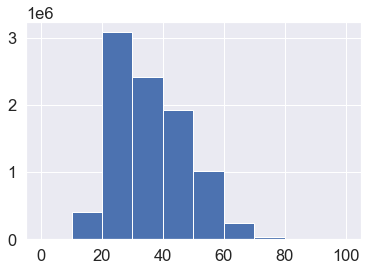

In [390]:
df_att["ETA"].hist()

As we can see there entry that presente an age < 16, is illegal to work in italy until 16 years old, moreover the retirement age in italy is about 67 years old so we can delete all entries with age < 16 and age > 67 that are probably in error in the dataset.

In [391]:
df_att.loc[(df_att["ETA"] < 16) | (df_att["ETA"] > 67)]

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,PROVINCIAIMPRESA
546,2019-12-07,M,95,Attività di organizzazioni che perseguono fini...,LAUREA - Vecchio o nuovo ordinamento,LAVORO AUTONOMO NELLO SPETTACOLO,LECCO
964,2013-08-04,M,68,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,LECCO
1480,2020-05-02,M,68,Coltivazioni agricole associate all'allevament...,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,LODI
1521,2019-08-08,M,70,"Coltivazioni miste di cereali, legumi da grane...",NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,MANTOVA
1574,2020-12-02,M,71,Coltivazione di cereali (escluso il riso),LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,MANTOVA
...,...,...,...,...,...,...,...
9578758,2020-12-11,F,10,Programmazione e trasmissioni televisive,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO AUTONOMO NELLO SPETTACOLO,MILANO
9578816,2016-01-08,M,69,Riproduzione di supporti registrati,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO AUTONOMO NELLO SPETTACOLO,MILANO
9578891,2010-01-04,M,68,Costruzione di edifici residenziali e non resi...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,BRESCIA
9579417,2018-10-07,F,73,Legatoria e servizi connessi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,CREMONA


In [392]:
df_att = df_att.loc[(df_att["ETA"] >= 16) & (df_att["ETA"] <= 67)]
df_ces = df_ces.loc[(df_ces["ETA"] >= 16) & (df_ces["ETA"] <= 67)]

# Data Sampling
In this analysisi only data from 2010 to 2021 is taken in account, so let's remove data outside this intervall and then take 100000 samples

In [393]:
from_date = "2010-01-01"
to_date = "2021-12-31"
df_att = df_att.loc[(df_att["DATA"]>=from_date) & (df_att["DATA"]<=to_date)]

Let's take 100000 samples from each dataset

In [394]:
df_att = df_att.sample(100000, replace=False)

# Statistics

Let's start calculating some statstics metrics for numerical columns, in this case only the age column <code>"ETA"</code>

In [395]:
print("Activated Contracts dataset")
df_att.describe()

Activated Contracts dataset


,ETA
count,100000.000000
mean,35.279090
std,11.586967
min,16.000000
25%,25.000000
50%,34.000000
75%,44.000000
max,67.000000


## Frquency Analysis
**Gender distribution**

Text(0.5, 1.0, 'Gender Distribution for Active Contract')

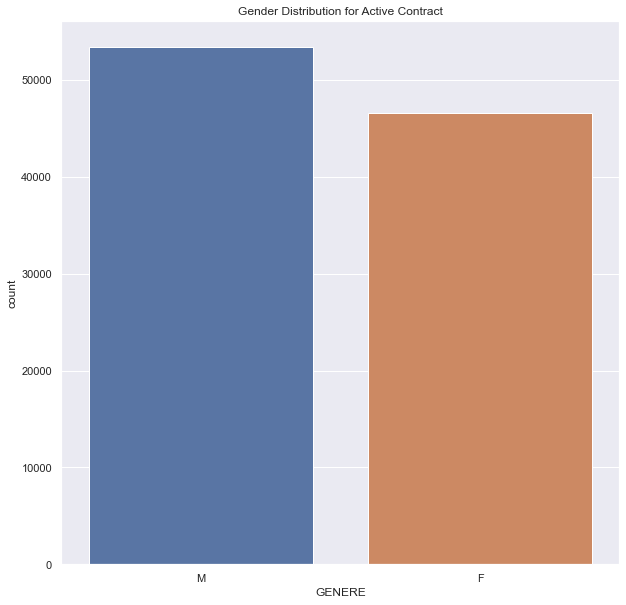

In [396]:
sns.set(rc={"figure.figsize": (10, 10)})
count_att = sns.countplot(x="GENERE", data=df_att)
count_att.set_title("Gender Distribution for Active Contract")


**Age distribution**
Now let's plot the age distribution in the 2 datasets

Text(0.5, 1.0, 'Age distribution on Activated Contracts dataset')

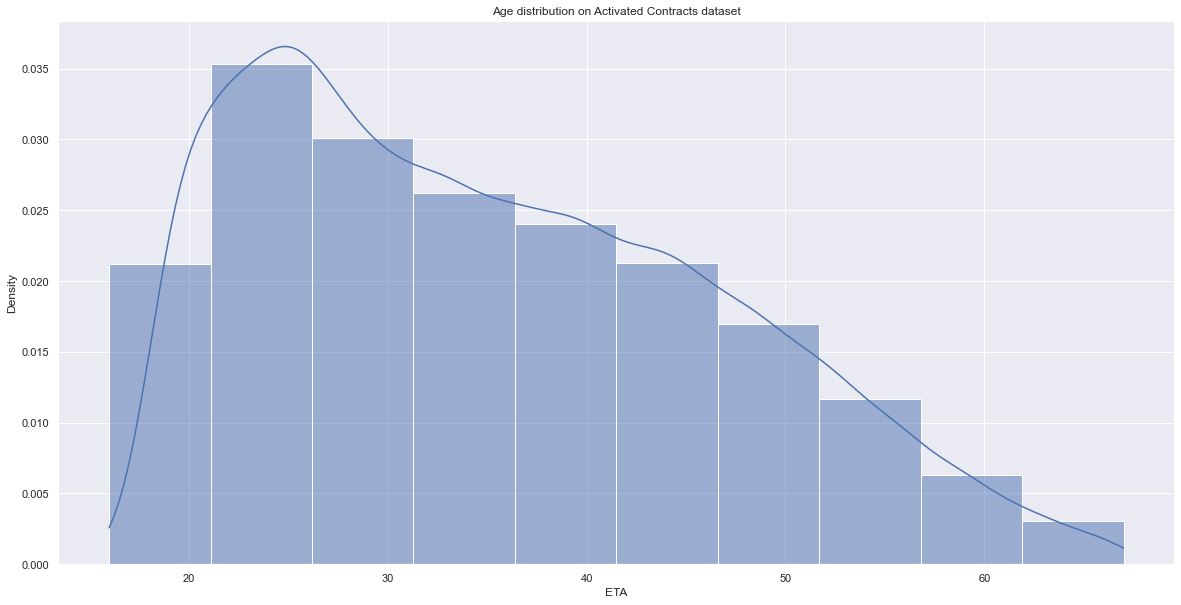

In [397]:
sns.set(rc={"figure.figsize": (20, 10)})
sns.histplot(df_att.ETA, label="AGE'", stat="density", bins=10, kde=True).set_title("Age distribution on Activated Contracts dataset")

**Top frequent activated and terminated contract**

In [398]:
freq_settore_att = df_att.groupby("SETTOREECONOMICODETTAGLIO")["SETTOREECONOMICODETTAGLIO"].count()
freq_settore_att.sort_values(ascending=False, inplace=True)
freq_settore_att = freq_settore_att.head(10)
df_top_set_att = freq_settore_att.to_frame()

df_top_set_att.rename(columns={df_top_set_att.columns[0]:"FREQUENCY"}, inplace=True)
df_top_set_att.reset_index(inplace=True)
df_top_set_att.rename(columns={df_top_set_att.columns[0]:"BUSINESS"}, inplace=True)



Top Frequency of Activated Contract per business


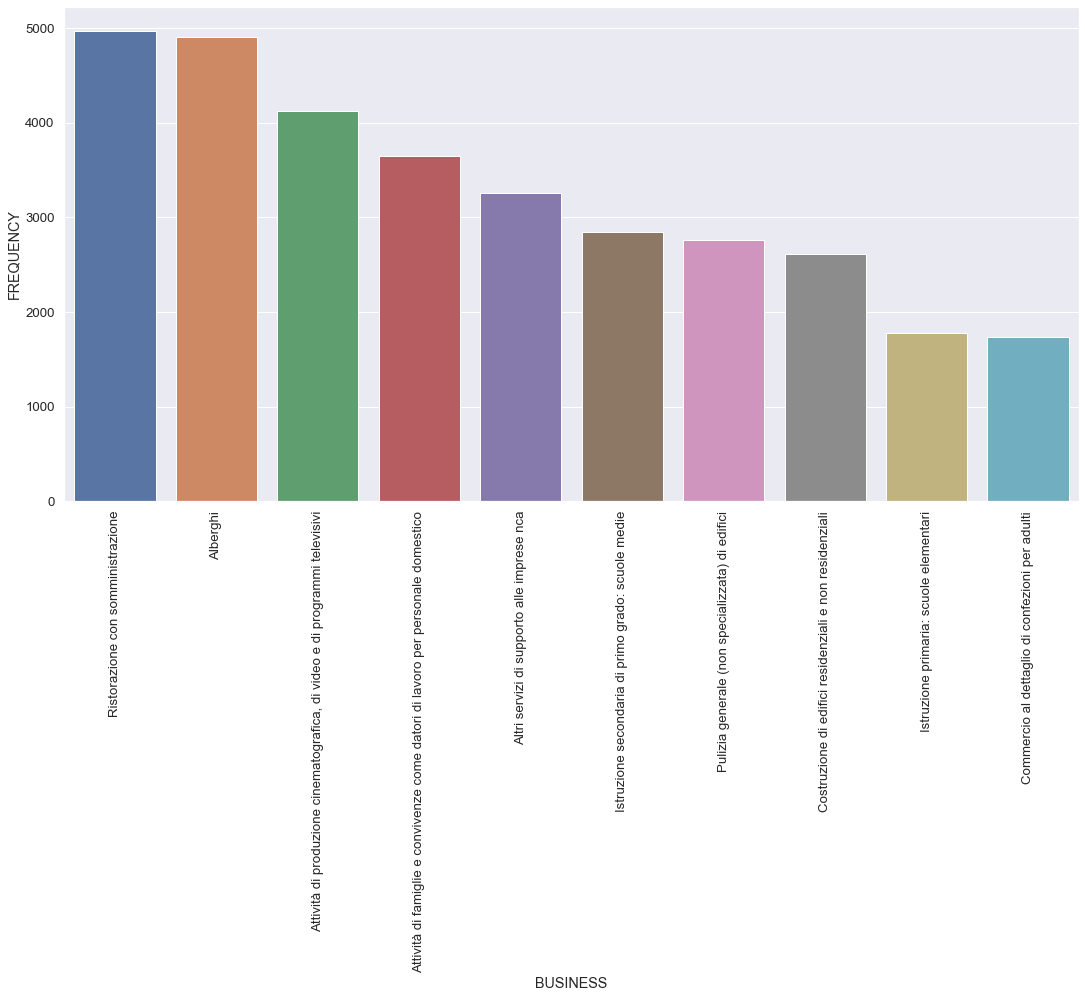

In [399]:
sns.set(rc={"figure.figsize": (40, 20)}, font_scale=1.2)
plt.subplot(2, 2, 1)
barplot = sns.barplot(x="BUSINESS", y="FREQUENCY", data=df_top_set_att)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
print("Top Frequency of Activated Contract per business")


**Geographic Distribution**

Geographic Distribution


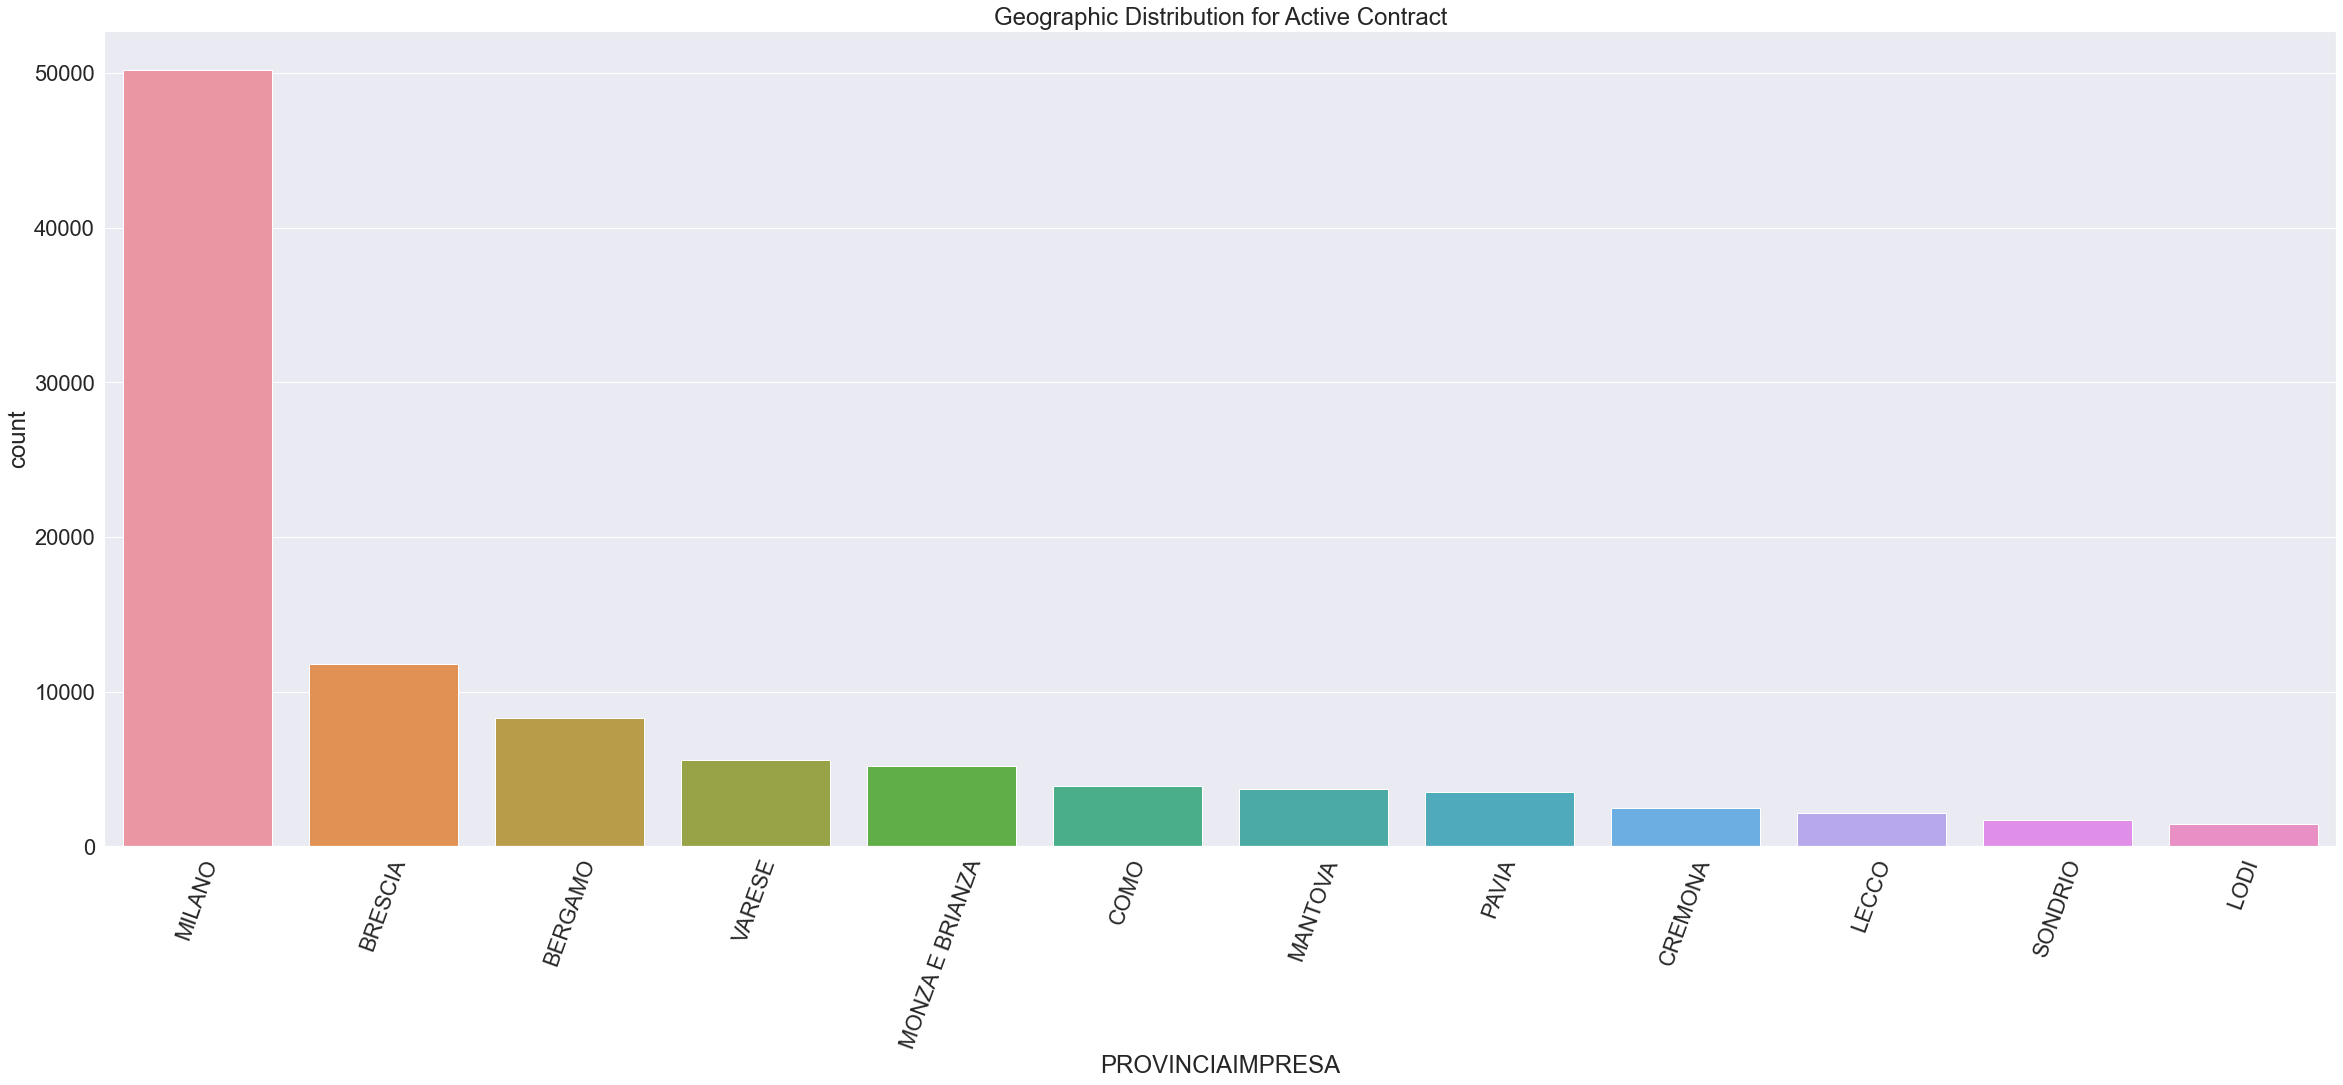

In [400]:
sns.set(rc={"figure.figsize": (40, 15)}, font_scale=2)
count_att = sns.countplot(x="PROVINCIAIMPRESA", data=df_att, order=df_att["PROVINCIAIMPRESA"].value_counts().index)
count_att.set_title("Geographic Distribution for Active Contract")
count_att.set_xticklabels(count_att.get_xticklabels(), rotation=70)

print("Geographic Distribution")

**Contract type Distribution**

Contract type Distribution


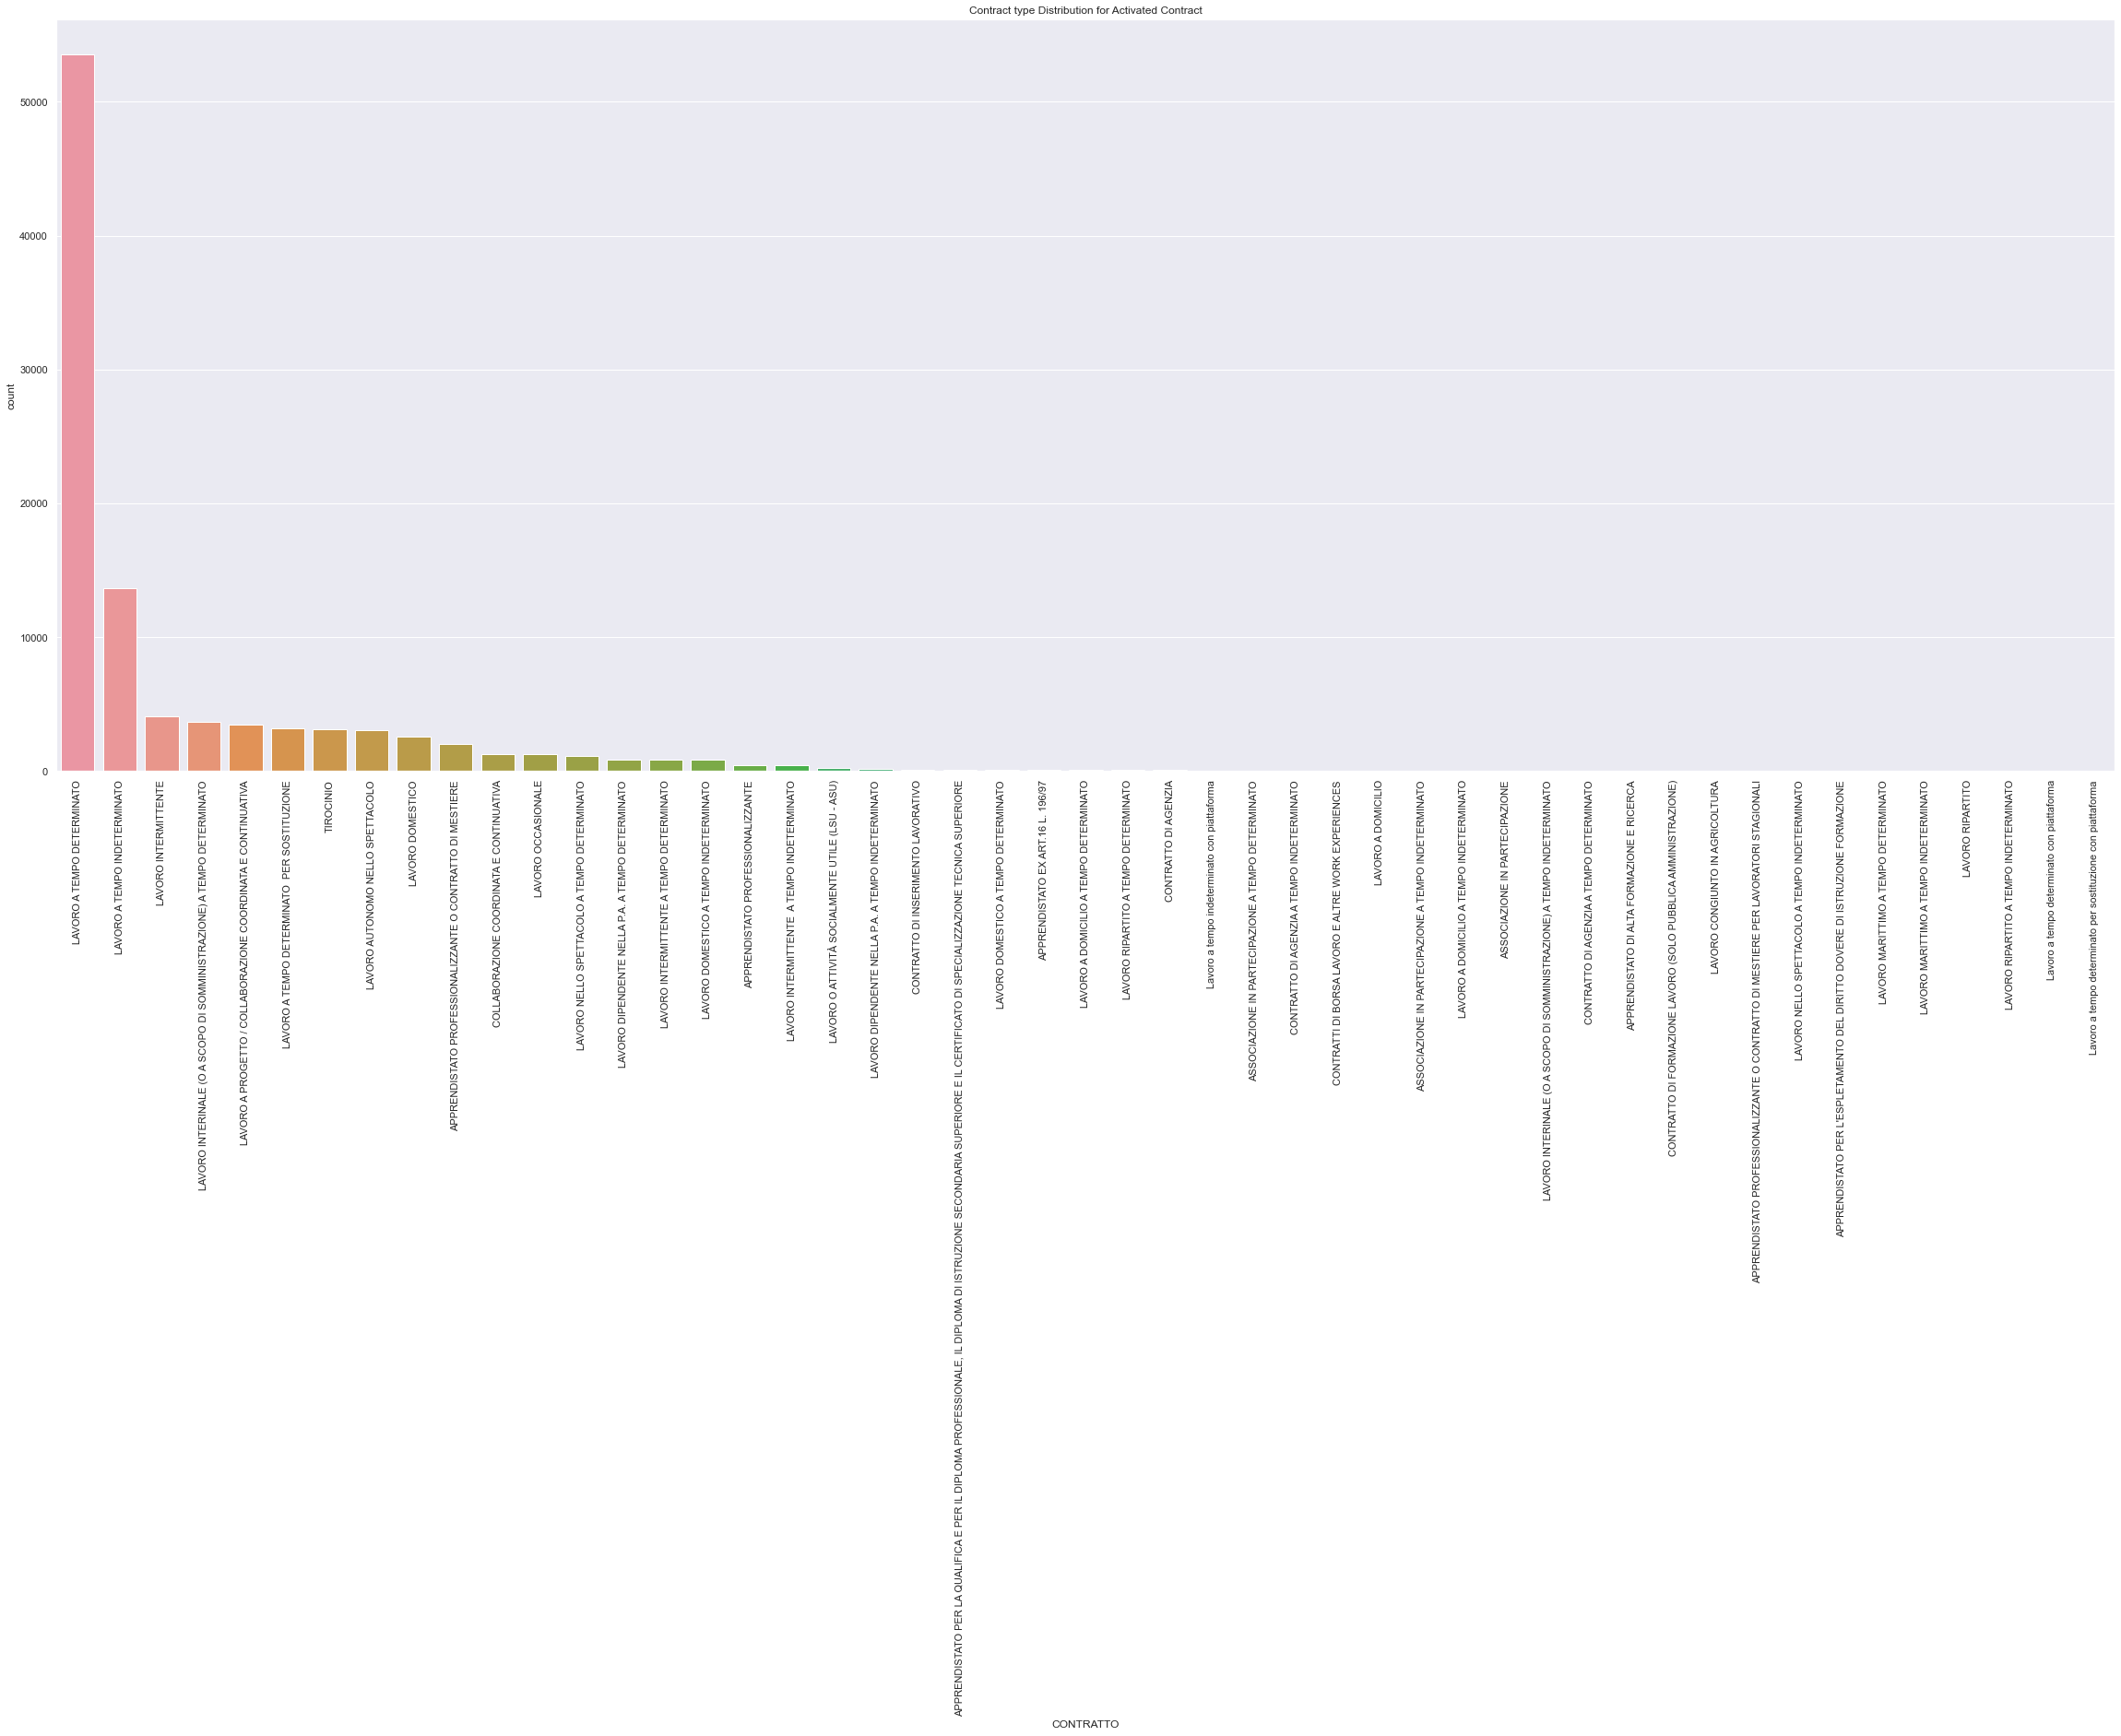

In [401]:
sns.set(rc={"figure.figsize": (40, 15)})
count_att = sns.countplot(x="CONTRATTO", data=df_att, order=df_att["CONTRATTO"].value_counts().index)
count_att.set_title("Contract type Distribution for Activated Contract")
count_att.set_xticklabels(count_att.get_xticklabels(), rotation=90)

print("Contract type Distribution")

As you can see there are too many different values let's group together similar contract type

In [402]:
def group_contract(contract):
    if "INDETERMINATO" in contract:
        return "INDETERMINATO"
    else:
        return "DETERMINATO"

    
df_att["CONTRATTO"] = df_att["CONTRATTO"].apply(group_contract)

Contract type Distribution


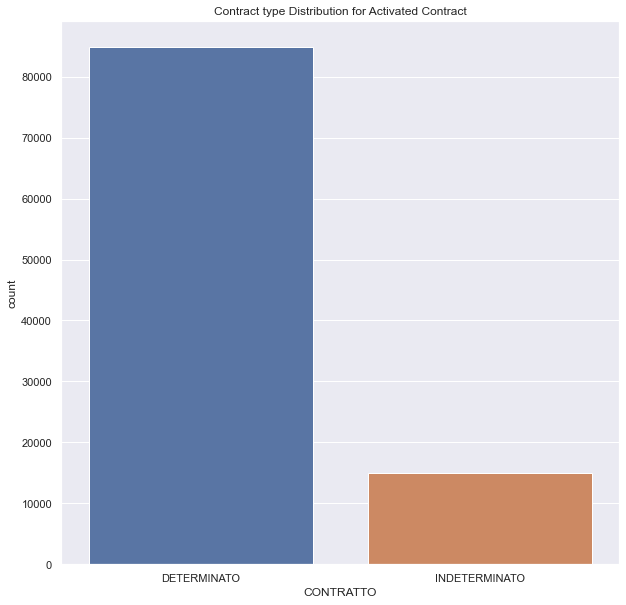

In [403]:
sns.set(rc={"figure.figsize": (10, 10)})
count_att = sns.countplot(x="CONTRATTO", data=df_att, order=df_att["CONTRATTO"].value_counts().index)
count_att.set_title("Contract type Distribution for Activated Contract")

print("Contract type Distribution")

**Education Distribution**

Education Distribution


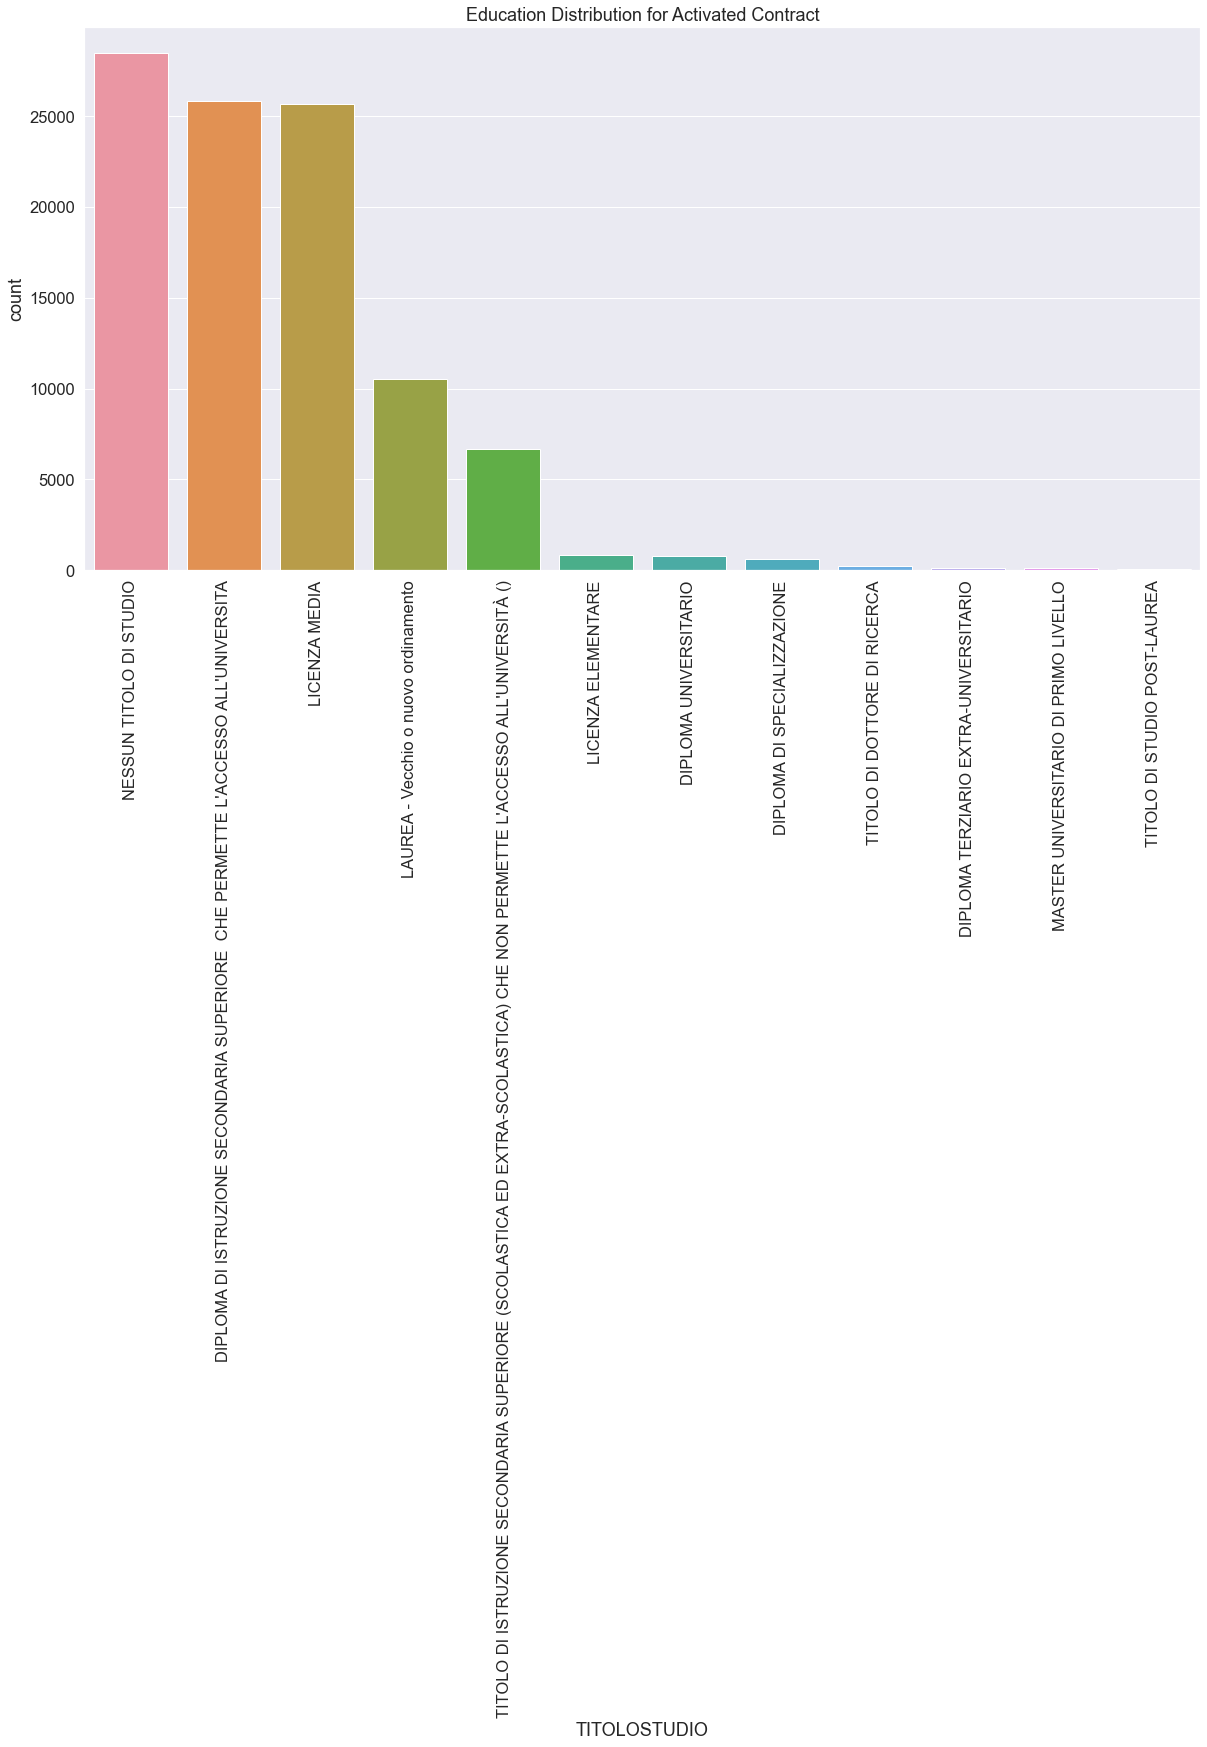

In [404]:
sns.set(rc={"figure.figsize": (20, 10)}, font_scale=1.5)
count_att = sns.countplot(x="TITOLOSTUDIO", data=df_att, order=df_att["TITOLOSTUDIO"].value_counts().index)
count_att.set_title("Education Distribution for Activated Contract")
count_att.set_xticklabels(count_att.get_xticklabels(), rotation=90)

print("Education Distribution")

## Anticipation of the labor market, where new job opportunitites will be created
In order to achieve the objective of this analysis I divide the dataset of activated contract in 4 interval of 2 years each:
<ul>
    <li>01/01/2012 - 31/12/2013</li>
    <li>01/01/2014 - 31/12/2015</li>
    <li>01/01/2016 - 31/12/2017</li>
    <li>01/01/2018 - 31/12/2019</li>
    <li>01/01/2020 - 31/12/2021</li>
</ul>

In [405]:
df_2012_2013 = df_att.loc[(df_att["DATA"]>="2012-01-01") & (df_att["DATA"]<="2013-12-31")]
df_2014_2015 = df_att.loc[(df_att["DATA"]>="2014-01-01") & (df_att["DATA"]<="2015-12-31")]
df_2016_2017 = df_att.loc[(df_att["DATA"]>="2016-01-01") & (df_att["DATA"]<="2017-12-31")]
df_2018_2019 = df_att.loc[(df_att["DATA"]>="2018-01-01") & (df_att["DATA"]<="2019-12-31")]
df_2020_2021 = df_att.loc[(df_att["DATA"]>="2020-01-01") & (df_att["DATA"]<="2021-12-31")]

As we can see from the barplots below in the 2020-2021 we have a relevant increase of contract for "Attività di famiglie e convivenze come datori di lavoro per personale domestico", probably due to the COVID-19 pandemic. For the same reason the activated contract for "Alberghi" and "Ristorazione" are decreased

Top 5 Frequency of Activated Contract per business per period


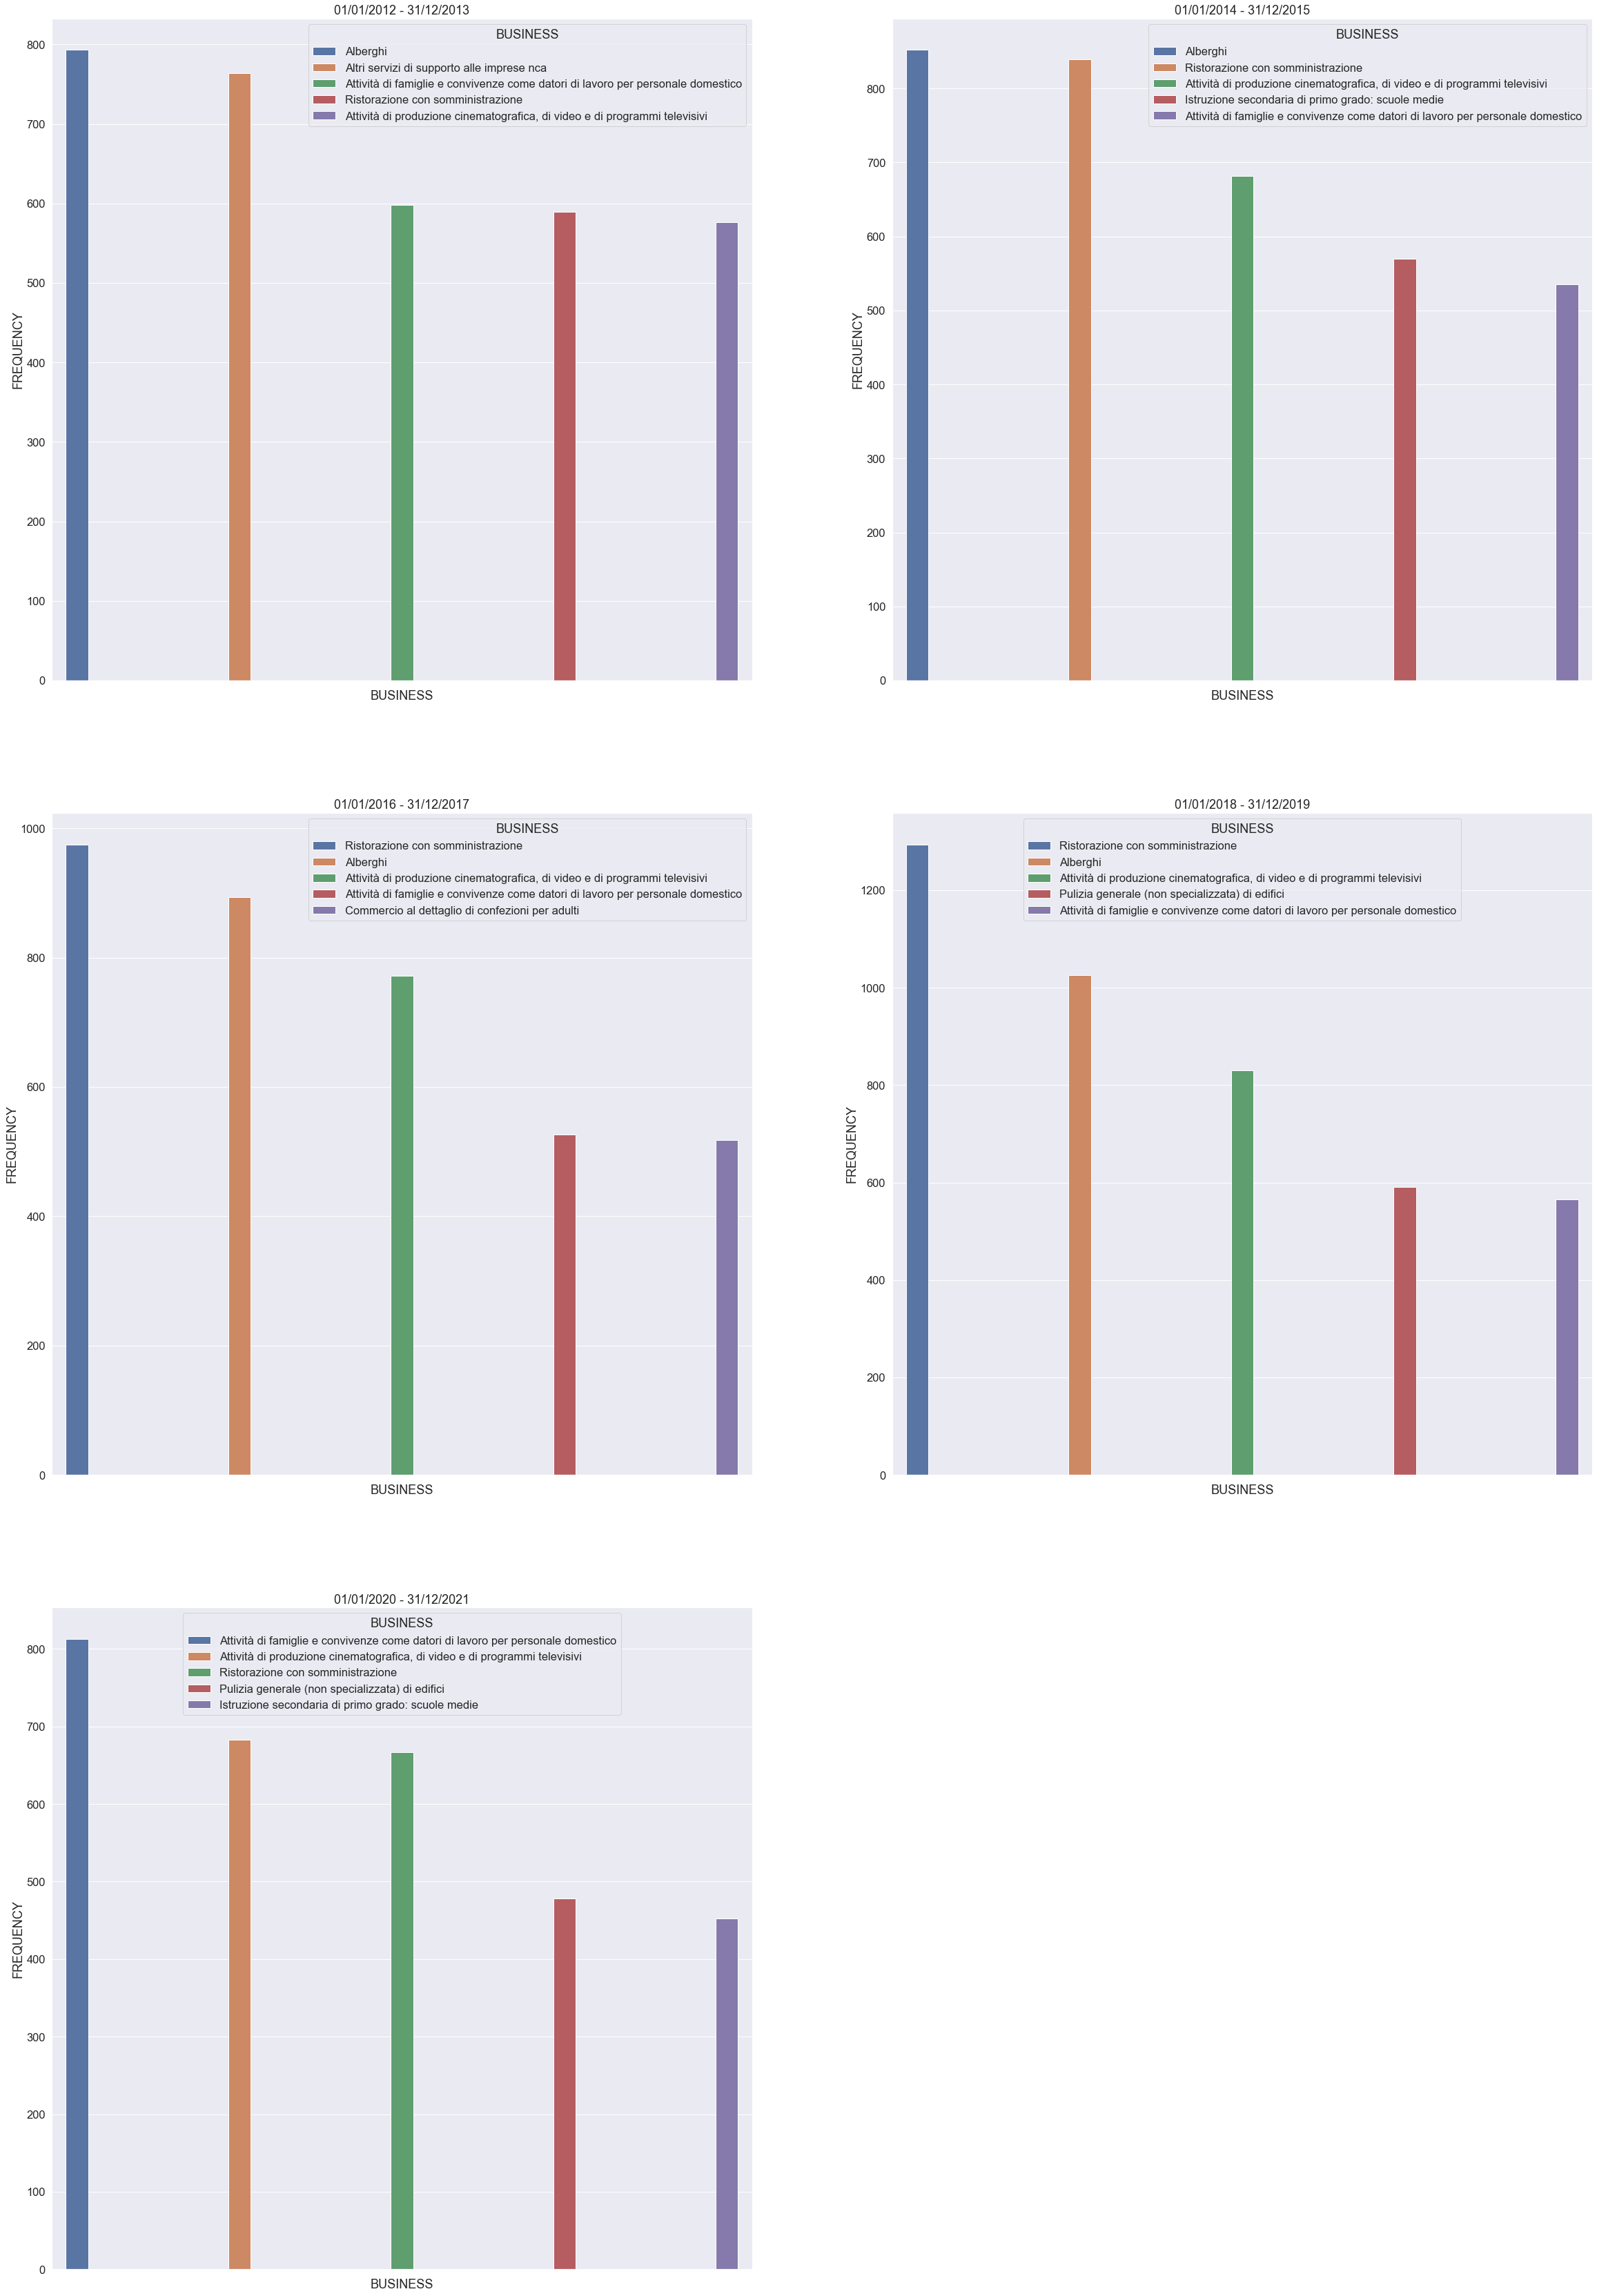

In [406]:
def barplot_interval(df, x, interval):
    freq_settore_att = df.groupby("SETTOREECONOMICODETTAGLIO")["SETTOREECONOMICODETTAGLIO"].count()
    freq_settore_att.sort_values(ascending=False, inplace=True)
    freq_settore_att = freq_settore_att.head(5)
    df_top_set_att = freq_settore_att.to_frame()
    df_top_set_att.rename(columns={df_top_set_att.columns[0]:"FREQUENCY"}, inplace=True)
    df_top_set_att.reset_index(inplace=True)
    df_top_set_att.rename(columns={df_top_set_att.columns[0]:"BUSINESS"}, inplace=True)
    
    sns.set(rc={"figure.figsize": (40, 60)}, font_scale=1.5)
    plt.subplot(3, 2, x)
    barplot = sns.barplot(x="BUSINESS", y="FREQUENCY", hue="BUSINESS", data=df_top_set_att)
    barplot.set_xticklabels([])
    barplot.set_title(interval)

barplot_interval(df_2012_2013, 1, "01/01/2012 - 31/12/2013")
barplot_interval(df_2014_2015, 2, "01/01/2014 - 31/12/2015")
barplot_interval(df_2016_2017, 3, "01/01/2016 - 31/12/2017")
barplot_interval(df_2018_2019, 4, "01/01/2018 - 31/12/2019")
barplot_interval(df_2020_2021, 5, "01/01/2020 - 31/12/2021")

print("Top 5 Frequency of Activated Contract per business per period")

## Probability to have a permanent contract in relation to the profession, the geography, the age
First of all let's cal only long term contract indentified with <code>INDETERMINATO</code> and only in the last year (2021).In order to calculate the probability we need the frequency of a long term contract **happen** divided by the **total sample** 

In [407]:
df_indet = df_att.loc[(df_att["DATA"]>="2021-01-01") & (df_att["DATA"]<="2021-12-31")]
df_indet = df_att.loc[(df_att["CONTRATTO"]=="INDETERMINATO")]

def perm_contract(df, df_indet, column):
    df_result = pd.DataFrame(data={"Value": [], "FreqInd": [], "Total": [], "Probability": []})
    values = df[column].unique()
    for v in values:
        row = {"Value": v, 
               "FreqInd": df_indet.loc[(df_indet[column]==v)].shape[0], 
               "Total": df.loc[(df[column]==v)].shape[0],
               "Probability": df_indet.loc[(df_indet[column]==v)].shape[0] / df.loc[(df[column]==v)].shape[0] * 100
              }
        df_result = df_result.append(row, ignore_index=True)
    df_result.sort_values(["Probability"], ascending=False, inplace=True)
    return df_result.head(30)


perm_contract(df_att, df_indet, "PROVINCIAIMPRESA")


,Value,FreqInd,Total,Probability
9,MONZA E BRIANZA,1023.0,5169.0,19.791062
11,LODI,258.0,1457.0,17.707618
0,BERGAMO,1393.0,8332.0,16.718675
6,VARESE,904.0,5580.0,16.200717
2,PAVIA,567.0,3511.0,16.149245
8,BRESCIA,1866.0,11800.0,15.813559
4,LECCO,333.0,2176.0,15.303309
3,COMO,579.0,3923.0,14.759113
7,CREMONA,356.0,2463.0,14.453918
1,MILANO,7050.0,50205.0,14.042426


In [408]:
perm_contract(df_att, df_indet, "ETA")

,Value,FreqInd,Total,Probability
14,36.0,505.0,2592.0,19.483025
41,38.0,478.0,2476.0,19.305331
21,33.0,524.0,2742.0,19.110139
25,40.0,464.0,2433.0,19.071106
11,35.0,485.0,2544.0,19.064465
29,32.0,530.0,2822.0,18.781006
18,47.0,353.0,1908.0,18.501048
7,34.0,493.0,2679.0,18.402389
37,41.0,424.0,2325.0,18.236559
19,49.0,319.0,1768.0,18.042986


In [409]:
perm_contract(df_att, df_indet, "SETTOREECONOMICODETTAGLIO")

,Value,FreqInd,Total,Probability
1032,Fabbricazione di strumenti musicali (incluse p...,1.0,1.0,100.000000
1022,Produzione di malta,1.0,1.0,100.000000
968,Istituti di moneta elettronica (Imel),4.0,4.0,100.000000
897,Riparazione di orologi e di gioielli,1.0,1.0,100.000000
1058,Agenti e rappresentanti di calzature ed accessori,1.0,1.0,100.000000
971,Noleggio di autocarri e di altri veicoli pesanti,1.0,1.0,100.000000
1059,"Mediatori in materie prime agricole, materie p...",1.0,1.0,100.000000
920,Fabbricazione di fibre ottiche,1.0,1.0,100.000000
479,"Commercio all'ingrosso di tè, cacao e spezie",1.0,1.0,100.000000
842,Fabbricazione di altri prodotti di cokeria,1.0,1.0,100.000000


As we can see from the probability table above we can say that:
<ul>
    <li>In Monza e Brianza there is more probability to find a permanent contract: 19%</li>
    <li>The maximum probability to have a permanent contract is at the age of 36 years old</li>
    <li>Instead for business we can not say anything because for the highest probability with few samples</li>
</ul>